In [19]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

db_connection = sql.connect(host='', database='', user='', password='')
db_cursor = db_connection.cursor()

query = 'SELECT * FROM all_physical'
db_cursor.execute(query)
table_rows = db_cursor.fetchall()
df = pd.DataFrame(table_rows)
data = pd.read_sql(query, db_connection)

In [20]:
for i in range(0, len(data)):
    data.iloc[i]['Timestamp'] = dt.datetime.strptime(data.iloc[i]['Timestamp'],' %d/%m/%Y %I:%M:%S %p')

In [21]:
for i in range(0, len(data)):
    data.iloc[i]['Timestamp'] = data.iloc[i]['Timestamp'].strftime('%Y-%m-%d %H:%M:%S')

In [22]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [23]:
data = data.sort('Timestamp')

/Users/yingwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [6]:
data.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,EVENT
449919,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0,4.277749,0.0002563035,1,1,1,Normal
449920,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0,4.277749,0.0002563035,1,1,1,Normal
449921,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0,4.277749,0.0002563035,1,1,1,Normal
449922,2015-12-22 16:00:03,2.428338,260.285,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0,4.277749,0.0002563035,1,1,1,Normal
449923,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0,4.277749,0.0002563035,1,1,1,Normal


In [24]:
data.ix[:, 'FIT101':'P603'] = data.ix[:, 'FIT101':'P603'].astype(float)

# Compare means of continous features during normal vs. attack timestamp

In [25]:
continuous_features_group1 = ['FIT101','AIT202','FIT201',
                       'DPIT301','FIT301','FIT401',
                      'AIT501','AIT504','FIT501','FIT502','FIT503','FIT504',
                      'PIT502','FIT601']

In [26]:
continuous_features_group2 = ['LIT101','AIT201','AIT203','LIT301','AIT401','AIT402','LIT401',
                      'AIT502','AIT503',
                      'PIT501','PIT503']

In [10]:
data['EVENT'] = data['EVENT'].str.replace('A ttack', 'Attack')
normal = data[data['EVENT'] == 'Normal']
attack = data[data['EVENT'] == 'Attack']
print(np.mean(normal['FIT101']))
print(np.mean(attack['FIT101']))

1.8443608147166486
0.764648407621463


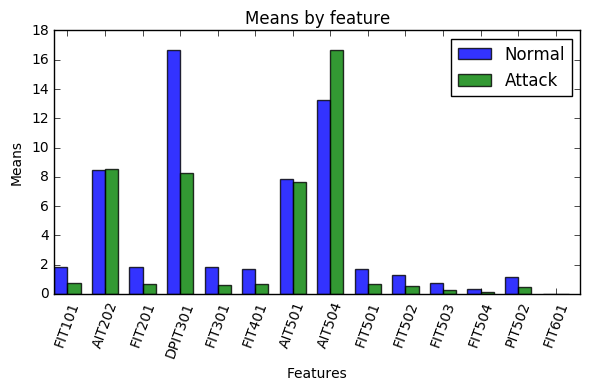

In [11]:
# data to plot
n_groups = len(continuous_features_group1)
means_normal = ()
for i in continuous_features_group1:
    means_normal = means_normal + (np.mean(normal[i]),)
means_attack = ()
for i in continuous_features_group1:
    means_attack = means_attack + (np.mean(attack[i]),)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_normal, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Normal')
 
rects2 = plt.bar(index + bar_width, means_attack, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Attack')
 
plt.xlabel('Features')
plt.ylabel('Means')
plt.title('Means by feature')
plt.xticks(index + bar_width, ('FIT101','AIT202','FIT201',
                       'DPIT301','FIT301','FIT401',
                      'AIT501','AIT504','FIT501','FIT502','FIT503','FIT504',
                      'PIT502','FIT601'), rotation=70)
plt.legend()
 
plt.tight_layout()
plt.show()


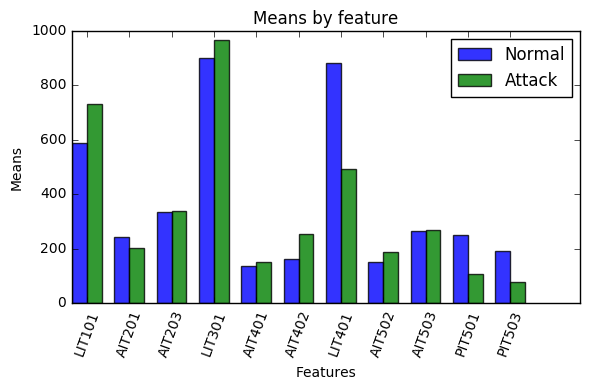

In [12]:
# data to plot
n_groups = len(continuous_features_group2)
means_normal = ()
for i in continuous_features_group2:
    means_normal = means_normal + (np.mean(normal[i]),)
means_attack = ()
for i in continuous_features_group2:
    means_attack = means_attack + (np.mean(attack[i]),)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_normal, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Normal')
 
rects2 = plt.bar(index + bar_width, means_attack, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Attack')
 
plt.xlabel('Features')
plt.ylabel('Means')
plt.title('Means by feature')
plt.xticks(index + bar_width, ('LIT101','AIT201','AIT203','LIT301','AIT401','AIT402','LIT401',
                      'AIT502','AIT503',
                      'PIT501','PIT503'), rotation=70)
plt.legend()
 
plt.tight_layout()
plt.show()

# Among all the continuous features, 
# the mean values of FIT101, FIT201, DPIT301, FIT301, FIT401, LIT401, FIT501, FIT502, FIT503, FIT504, PIT501, PIT502, PIT503
# during normal and attack timestamps have bigger differences.

# Compare means of continous features during normal vs. attack days

In [30]:
split_time = dt.datetime.strptime('2015-12-28 9:59:59', '%Y-%m-%d %H:%M:%S')

In [32]:
normal_day = data[data['Timestamp'] < split_time]
attack_day = data[data['Timestamp'] > split_time]

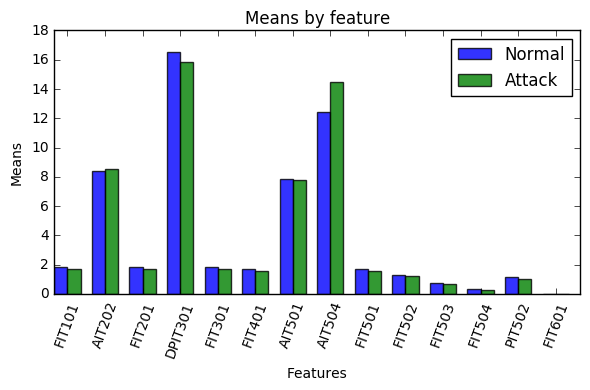

In [33]:
# data to plot
n_groups = len(continuous_features_group1)
means_normal = ()
for i in continuous_features_group1:
    means_normal = means_normal + (np.mean(normal_day[i]),)
means_attack = ()
for i in continuous_features_group1:
    means_attack = means_attack + (np.mean(attack_day[i]),)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_normal, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Normal')
 
rects2 = plt.bar(index + bar_width, means_attack, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Attack')
 
plt.xlabel('Features')
plt.ylabel('Means')
plt.title('Means by feature')
plt.xticks(index + bar_width, ('FIT101','AIT202','FIT201',
                       'DPIT301','FIT301','FIT401',
                      'AIT501','AIT504','FIT501','FIT502','FIT503','FIT504',
                      'PIT502','FIT601'), rotation=70)
plt.legend()
 
plt.tight_layout()
plt.show()

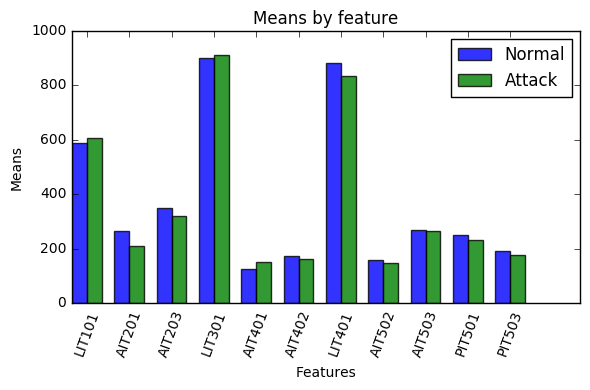

In [34]:
# data to plot
n_groups = len(continuous_features_group2)
means_normal = ()
for i in continuous_features_group2:
    means_normal = means_normal + (np.mean(normal_day[i]),)
means_attack = ()
for i in continuous_features_group2:
    means_attack = means_attack + (np.mean(attack_day[i]),)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_normal, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Normal')
 
rects2 = plt.bar(index + bar_width, means_attack, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Attack')
 
plt.xlabel('Features')
plt.ylabel('Means')
plt.title('Means by feature')
plt.xticks(index + bar_width, ('LIT101','AIT201','AIT203','LIT301','AIT401','AIT402','LIT401',
                      'AIT502','AIT503',
                      'PIT501','PIT503'), rotation=70)
plt.legend()
 
plt.tight_layout()
plt.show()
# When comparing means of continuous features during normal and attack days, we do not see significant differences
# as we saw when comparing means during normal and attack timestamps

# Histograms for continous features, a closer look at variable distributions/outliers

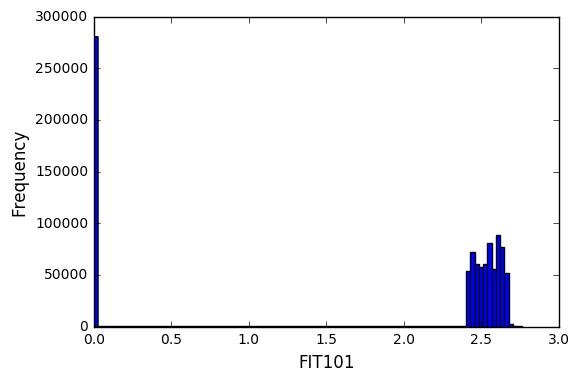

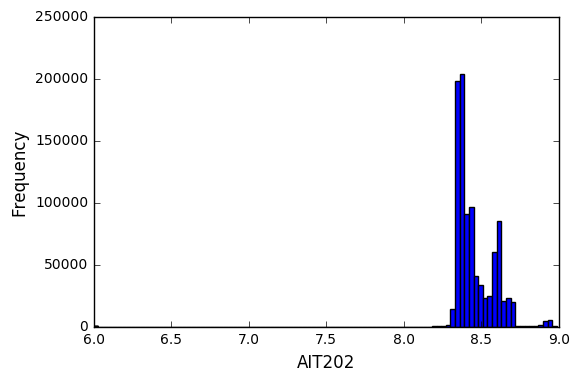

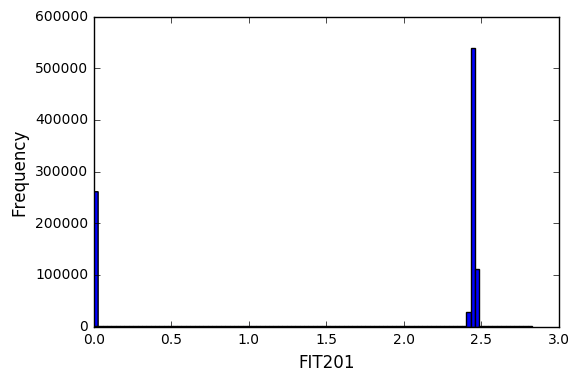

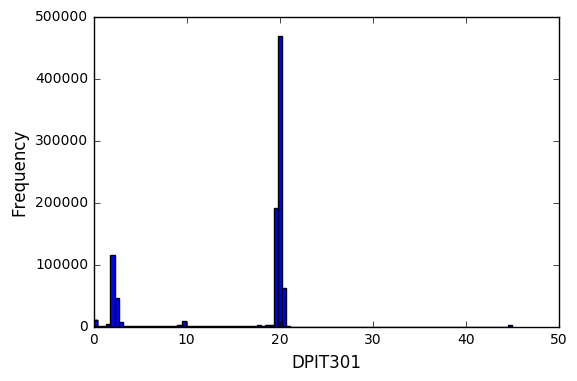

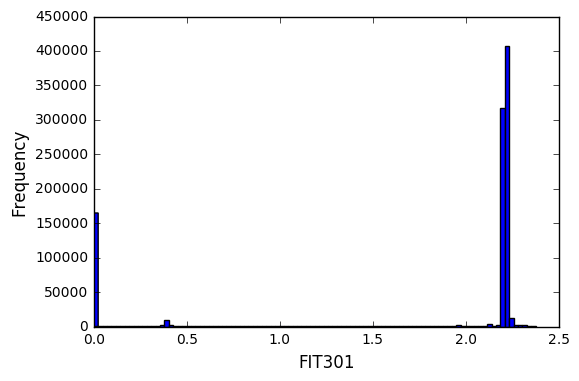

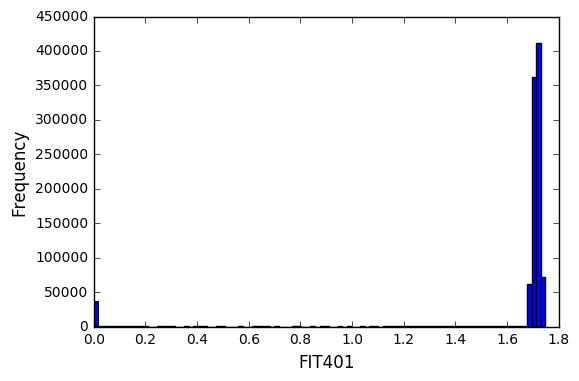

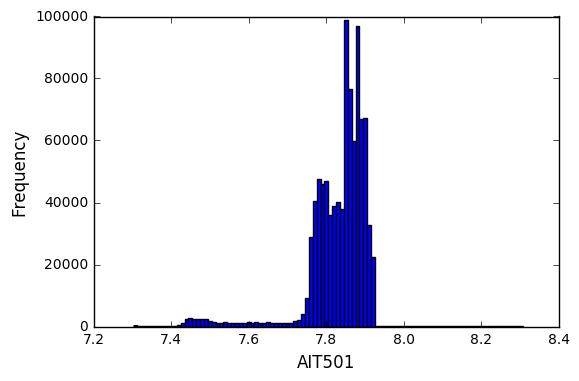

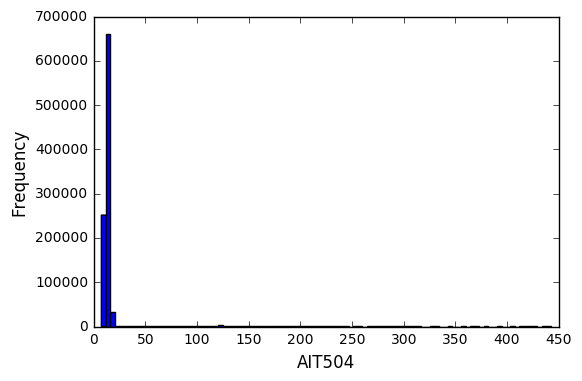

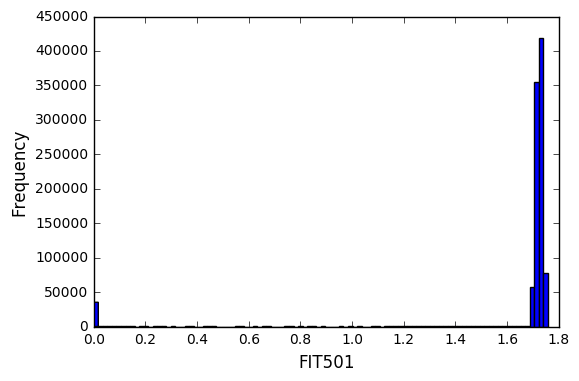

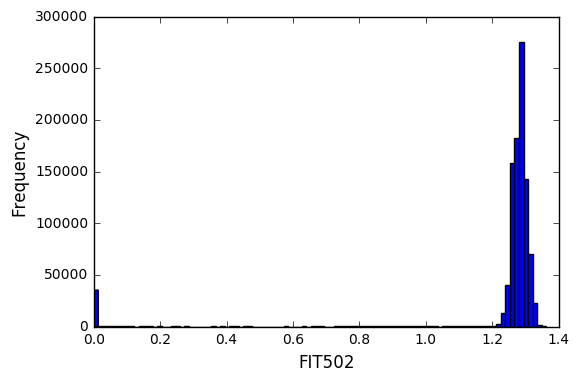

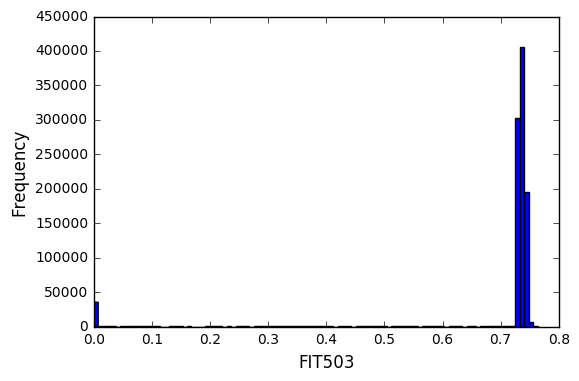

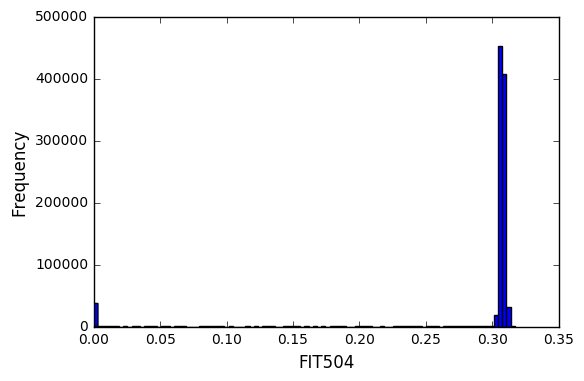

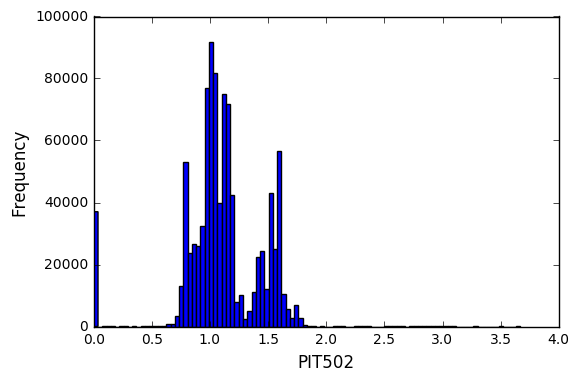

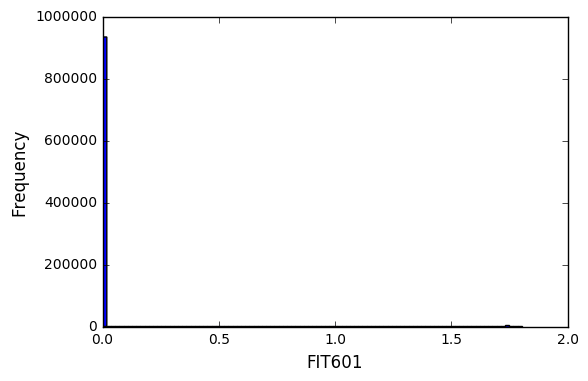

In [17]:
plt.figure(figsize=(6,4))
for i in continuous_features_group1 or i in continuous_featues_group2:
    plt.hist(data[i], bins=100)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(i, fontsize=12)
    plt.show()